In [226]:
import pymongo
import numpy as np

#Connect to mongoDB and get data from collection
client = pymongo.MongoClient() 
db = client.TrainingDataDB 

currentExpData = []
extractedExpData = []
for i in range(1,16):
    expCollectionName = "TakeOffExp"+str(i)
    
    expCollection = db[expCollectionName]
    
    expDocuments = expCollection.find({})
    currentTrialData = []
    for expDocument in expDocuments:
        expDataArray = expDocument['data']
        currentExpData.append(expDataArray)
        currentTrialData.append(expDataArray)
    currTrial = np.array(currentTrialData) #make it into numpy array
    #print currTrial.shape
    currTrialStd = np.std(currTrial, axis=0)
    #print "Standard deviation--------------------------------------------------------------------"
    #print currTrialStd
    currTrialMean = np.mean(currTrial, axis=0)
    #print "Mean----------------------------------------------------------------------------------"
    #print currTrialMean
    currTrialVar = np.var(currTrial, axis=0)
    #print "Variance----------------------------------------------------------------------------------"
    #print currTrialVar
    #currTrialAllExtData = np.array(zip(currTrialStd, currTrialMean))
    currTrialAllExtData = np.concatenate((currTrialStd, currTrialMean, currTrialVar), axis=0)
    #print "Concatenated---------------------------------------------------------------------------"
    #print currTrialAllExtData
    #print "Appended-------------------------------------------------------------------------------"
    #print currTrialAllExtData.shape
    extractedExpData.append(currTrialAllExtData)
    #print extractedExpData
    #print "END-------------------------------------------------------------------------------------"

expertDataArray = np.array(currentExpData)
expertExtractedDataArray = np.array(extractedExpData)
print expertExtractedDataArray.shape
#print expertDataArray.shape
#print discExpDataArray

(15L, 30L)


In [227]:
currentNovData = []
extractedNovData = []
for j in range (1,21):
    novCollectionName = "TakeOffNov"+str(j)
    
    novCollection = db[novCollectionName]
    
    novDocuments = novCollection.find({})
    currentNovTrialData = []
    if j==3:
        print "Skipping Trial #3" #Due to null values from the sensor which cause the classifier to crash
    else:
        for novDocument in novDocuments:
            novDataArray = novDocument['data']
            currentNovData.append(novDataArray)
            currentNovTrialData.append(novDataArray)
        currNovTrial = np.array(currentNovTrialData) #make it into numpy array
        #print currNovTrial.shape
        currNovTrialStd = np.std(currNovTrial, axis=0)
        #print "Standard deviation--------------------------------------------------------------------"
        #print currNovTrialStd
        currNovTrialMean = np.mean(currNovTrial, axis=0)
        #print "Mean----------------------------------------------------------------------------------"
        #print currNovTrialMean
        currNovTrialVar = np.var(currNovTrial, axis=0)
        #print "Variance----------------------------------------------------------------------------------"
        #print currNovTrialVar
        #currTrialAllExtData = np.array(zip(currNovTrialStd, currNovTrialMean))
        currNovTrialAllExtData = np.concatenate((currNovTrialStd, currNovTrialMean, currNovTrialVar),axis=0)
        #print "Concatenated---------------------------------------------------------------------------"
        #print currNovTrialAllExtData
        #print "Appended-------------------------------------------------------------------------------"
        #print currNovTrialAllExtData.shape
        extractedNovData.append(currNovTrialAllExtData)
        #print extractedNovData
        #print "END-------------------------------------------------------------------------------------"
    
#print currentNovData

noviceDataArray = np.array(currentNovData)
noviceExtractedDataArray = np.array(extractedNovData)
print noviceExtractedDataArray.shape
#print noviceDataArray.shape

Skipping Trial #3
(19L, 30L)


In [228]:
#Consolidate all data 
allData = np.concatenate((expertDataArray,noviceDataArray), axis=0)
#allData.shape

#Consolidate feature extracted data
allExtractedData = np.concatenate((expertExtractedDataArray,noviceExtractedDataArray),axis=0)
allExtractedData.shape

(34L, 30L)

In [230]:
#Create labels
expert_rows, expert_columns = expertExtractedDataArray.shape
#print expert_rows
expert_labels = np.zeros(expert_rows,)
#print expert_labels
novice_rows, novice_columns = noviceExtractedDataArray.shape
#print novice_rows
novice_labels = np.ones(novice_rows,)
#print novice_labels

all_labels = np.concatenate((expert_labels,novice_labels), axis=0)
print all_labels

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [231]:
from sklearn import preprocessing, cross_validation, neighbors, svm, tree
Data_train, Data_test, Labels_train, Labels_test = cross_validation.train_test_split(allExtractedData, all_labels, test_size=0.2)

#KNN
knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(Data_train, Labels_train)
knn_classifier.fit(Data_test, Labels_test)
knn_score = knn_classifier.score(Data_test, Labels_test)
print knn_score

0.428571428571


In [232]:
#SVM
svm_classifier = svm.SVC(kernel='linear', C = 1.0)
svm_classifier.fit(Data_train, Labels_train)
svm_classifier.fit(Data_test, Labels_test)
svm_score = svm_classifier.score(Data_test, Labels_test)
print svm_score

1.0


In [233]:
#DTree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(Data_train, Labels_train)
dt_classifier.fit(Data_test, Labels_test)
dtree_score = dt_classifier.score(Data_test, Labels_test)
print dtree_score

1.0


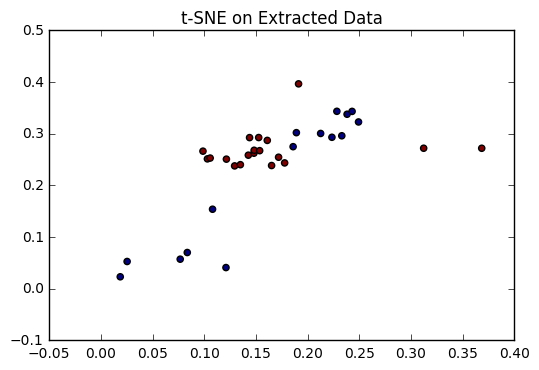

In [237]:
import matplotlib.pyplot as plt
plt.title('t-SNE on Extracted Data')
plt.scatter(allExtractedData[:,0], allExtractedData[:,1], c=all_labels)
plt.show()